# Generate example datasets

In [3]:
import numpy as np
from nexusformat.nexus import *
import matplotlib.pyplot as plt

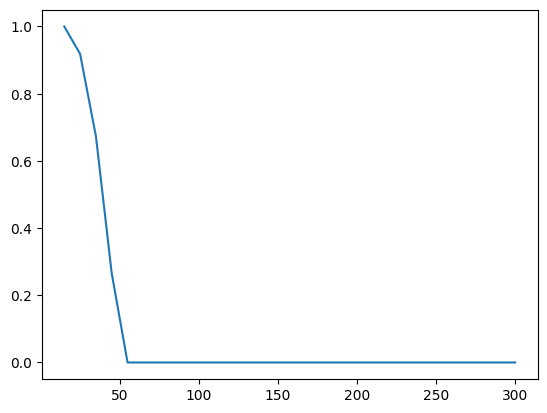

In [37]:
xs = np.array([int(x) for x in np.linspace(15,75,7)])
xs = np.concatenate((xs,[int(x) for x in np.linspace(80,300,10)]))
ys = []
for x in xs:
    if x < 50:
        y = np.abs(35**2-(x-15)**2)
        ys.append(y)
    else:
        ys.append(0)
ys = np.array(ys)
ys = ys/ys.max()
plt.plot(xs,ys)

In [40]:
import os

# Base directory
base_dir = "example_data/order_parameter/nxrefine/"

# Create the folders
for x in xs:
    folder_name = f"{x}"  # Format x to one decimal place
    full_path = os.path.join(base_dir, folder_name)
    os.makedirs(full_path, exist_ok=True)

In [78]:
from nxs_analysis_tools import plot_slice
from nexusformat.nexus import NXdata, NXfield
import numpy as np

for idx, T in enumerate(xs):
    # Create array
    array_size = (100, 150, 200)
    array = np.zeros(array_size)
    
    # Create coordinates
    x, y, z = np.meshgrid(np.linspace(-1.5, 1.5, array_size[0]),  # size of grid in real units
                          np.linspace(-1.5, 1.5, array_size[1]),
                          np.linspace(-1.5, 1.5, array_size[2]),
                          indexing='ij')
    
    # Grid parameters
    int_positions = [-1,0,1]  # integer crystallographic positions
    half_positions = [-0.5,0.5]  # half-integer crystallographic positions
    std_dev = 0.025  # in absolute coordinates (real units)
    amplitude_int = 1.0
    amplitude_half = ys[idx]*0.1

    # Add integer-position Gaussians
    for i in int_positions:
        for j in int_positions:
            for k in int_positions:
                mean = (i, j, k)
                gaussian = amplitude_int * np.exp(-((x - mean[0]) ** 2 +
                                                    (y - mean[1]) ** 2 +
                                                    (z - mean[2]) ** 2) / (2 * std_dev ** 2))
                array += gaussian

    # Add half-integer-position Gaussians
    for i in half_positions:
        for j in int_positions:
            for k in int_positions:
                mean = (i, j, k)
                # print("half-int mean:", mean)
                gaussian = amplitude_half * np.exp(-((x - mean[0]) ** 2 +
                                                     (y - mean[1]) ** 2 +
                                                     (z - mean[2]) ** 2) / (2 * std_dev ** 2))
                array += gaussian

    # Construct NXdata with Q from -1.5 to 1.5 reciprocal lattice units
    H = NXfield(np.linspace(-1.5, 1.5, array.shape[0]), name='Qh')
    K = NXfield(np.linspace(-1.5, 1.5, array.shape[1]), name='Qk')
    L = NXfield(np.linspace(-1.5, 1.5, array.shape[2]), name='Ql')

    out_data = NXdata(NXfield(array.transpose(2, 1, 0)*1e5, name='v'))

    # Save and plot
    nxsave(f'example_data/order_parameter/nxrefine/CsV3Sb5/sample_1b/{T}/transform.nxs', out_data)
    print(f'Saved {T} K data')
    # plot_slice(out_data[0.0, :, :], K, H, vmin=0.1, vmax=25, logscale=1)
    # plot_slice(out_data[0.5, :, :], K, H, vmin=0.1, vmax=25, logscale=1)


Saved 15 K data
Saved 25 K data
Saved 35 K data
Saved 45 K data
Saved 55 K data
Saved 65 K data
Saved 75 K data
Saved 80 K data
Saved 104 K data
Saved 128 K data
Saved 153 K data
Saved 177 K data
Saved 202 K data
Saved 226 K data
Saved 251 K data
Saved 275 K data
Saved 300 K data


In [68]:
for i,T in enumerate(xs):
    main_file = NXroot()
    main_file['entry'] = NXentry()
    main_file['entry']['transform'] = NXdata(NXlink(name='data',
                                               target='/entry/data/v',
                                               file=f'{T}/transform.nxs'), [L, K, H])
    main_file.entry.transform.attrs['angles'] = [90.,90.,90.]
    main_file.entry.transform.attrs['signal'] = 'data'
    main_file.entry.transform['title'] = f'{T}.000K Transform'
    print(main_file.tree)
    nxsave(f'example_data/order_parameter/nxrefine/CsV3Sb5/sample_1b/CsV3Sb5_{T}.nxs', main_file)

root:NXroot
  entry:NXentry
    transform:NXdata
      @angles = [90. 90. 90.]
      @axes = ['Ql', 'Qk', 'Qh']
      @signal = 'data'
      Qh = float64(100)
      Qk = float64(150)
      Ql = float64(200)
      data -> 15/transform.nxs['/entry/data/v']
      title = '15.000K Transform'
root:NXroot
  entry:NXentry
    transform:NXdata
      @angles = [90. 90. 90.]
      @axes = ['Ql', 'Qk', 'Qh']
      @signal = 'data'
      Qh = float64(100)
      Qk = float64(150)
      Ql = float64(200)
      data -> 25/transform.nxs['/entry/data/v']
      title = '25.000K Transform'
root:NXroot
  entry:NXentry
    transform:NXdata
      @angles = [90. 90. 90.]
      @axes = ['Ql', 'Qk', 'Qh']
      @signal = 'data'
      Qh = float64(100)
      Qk = float64(150)
      Ql = float64(200)
      data -> 35/transform.nxs['/entry/data/v']
      title = '35.000K Transform'
root:NXroot
  entry:NXentry
    transform:NXdata
      @angles = [90. 90. 90.]
      @axes = ['Ql', 'Qk', 'Qh']
      @signal = 'data